**Clustering (hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters.**

Data description:
 
The file EastWestAirlinescontains information on passengers who belong to an airline’s frequent flier program. 
For each passenger the data include information on their mileage history and on different ways they accrued or spent miles in the last year. 
The goal is to try to identify clusters of passengers that have similar characteristics for the purpose of targeting different segments for different types of mileage offers


ID --Unique ID

Balance--Number of miles eligible for award travel

Qual_mile--Number of miles counted as qualifying for Topflight status

cc1_miles -- Number of miles earned with freq. flyer credit card in the past 12 months:
cc2_miles -- Number of miles earned with Rewards credit card in the past 12 months:
cc3_miles -- Number of miles earned with Small Business credit card in the past 12 months:

1 = under 5,000
2 = 5,000 - 10,000
3 = 10,001 - 25,000
4 = 25,001 - 50,000
5 = over 50,000

Bonus_miles--Number of miles earned from non-flight bonus transactions in the past 12 months

Bonus_trans--Number of non-flight bonus transactions in the past 12 months

Flight_miles_12mo--Number of flight miles in the past 12 months

Flight_trans_12--Number of flight transactions in the past 12 months

Days_since_enrolled--Number of days since enrolled in flier program

Award--whether that person had award flight (free flight) or not

In [ ]:
#importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Load the data
airlines=pd.read_csv("G:\Data science\ExcelR\Assignments\EastWestAirlines.csv")
airlines.head()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [ ]:
airlines.shape

(3999, 12)

In [ ]:
airlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
ID                   3999 non-null int64
Balance              3999 non-null int64
Qual_miles           3999 non-null int64
cc1_miles            3999 non-null int64
cc2_miles            3999 non-null int64
cc3_miles            3999 non-null int64
Bonus_miles          3999 non-null int64
Bonus_trans          3999 non-null int64
Flight_miles_12mo    3999 non-null int64
Flight_trans_12      3999 non-null int64
Days_since_enroll    3999 non-null int64
Award                3999 non-null int64
dtypes: int64(12)
memory usage: 374.9 KB


In [ ]:
airlines.isnull().sum()

ID                   0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award                0
dtype: int64

No null objects and all the datatypes are correct.

In [ ]:
#Drop ID
airlines=airlines.drop(["ID"],axis=1)

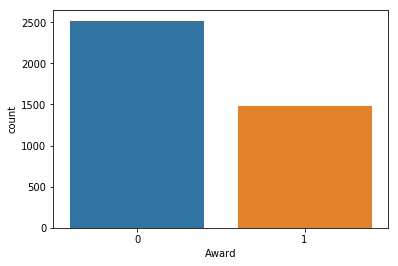

In [ ]:
sns.countplot(airlines["Award"])

 Since, most of the customers are not awarded with any schemes, let us drop Award column

In [ ]:
airlines=airlines.drop(["Award"],axis=1)

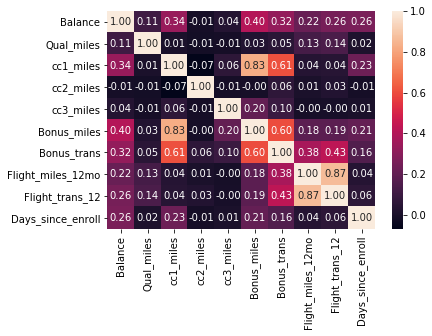

In [ ]:
sns.heatmap(airlines.corr(),annot=True,fmt='.2f')

It is obvious that as transactions increases, the customers travel more miles and hence, miles number increases.
Also as customers make more number of bonus transactions, the number of bonus miles also increases.
Therefore we can say that there exists collinearity between these variables and hence consider any one of these for analysis.

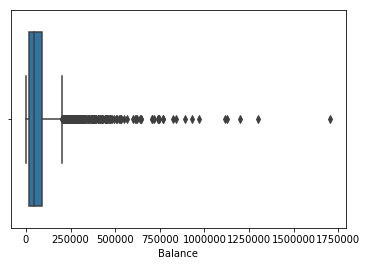

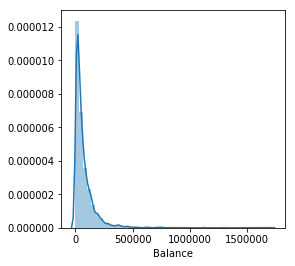

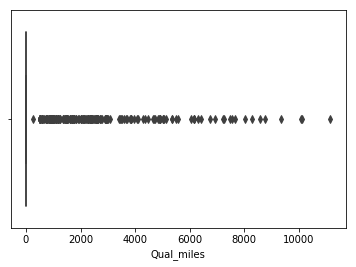

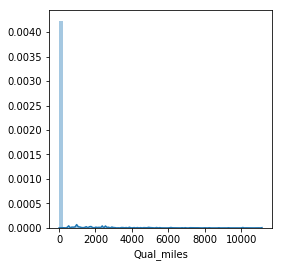

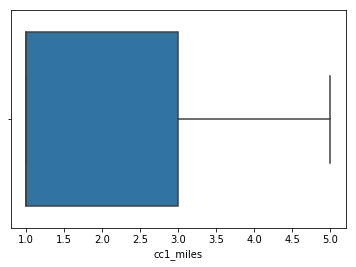

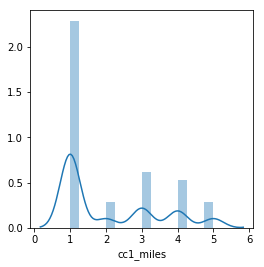

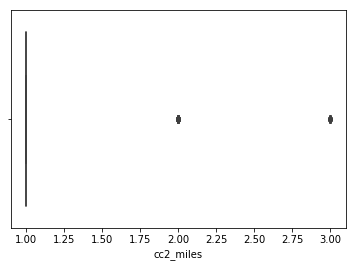

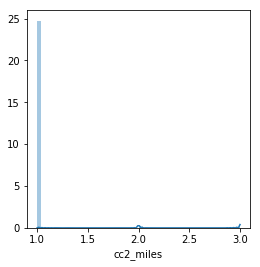

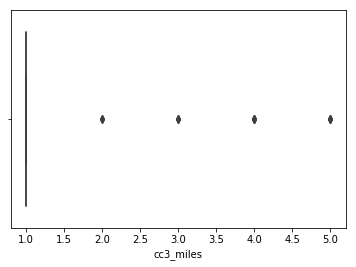

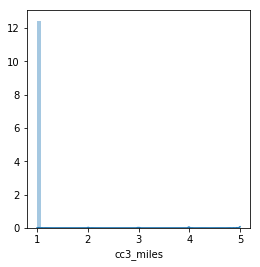

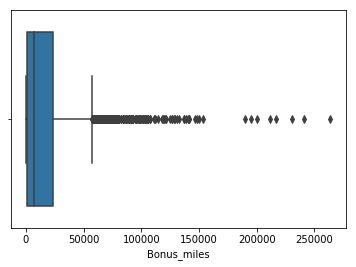

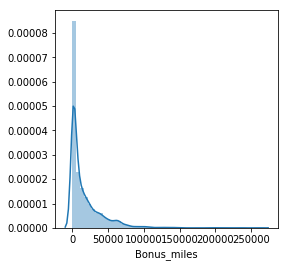

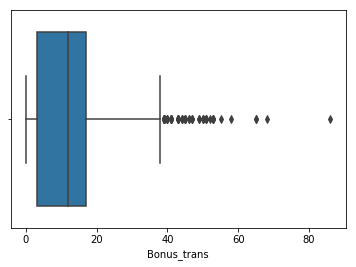

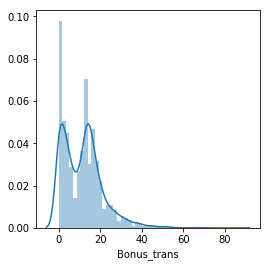

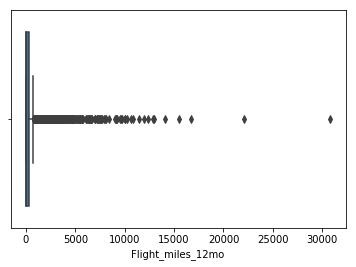

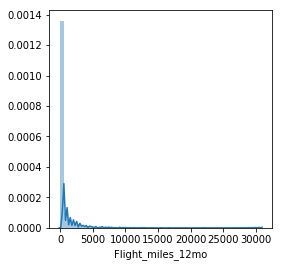

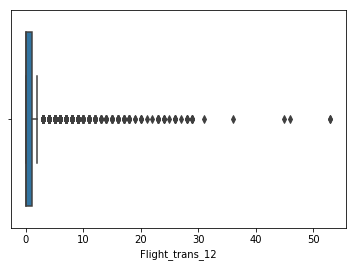

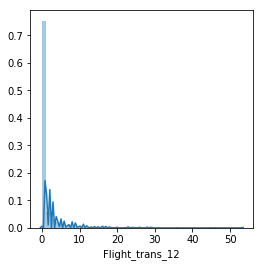

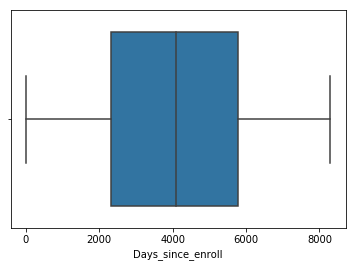

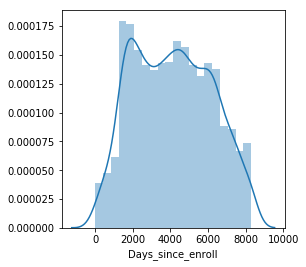

In [ ]:
#Outlier detection
for col in airlines.columns:
    plt.figure(figsize=(6,4))
    sns.boxplot(airlines[col])
    plt.show()
    plt.figure(figsize=(4,4))
    sns.distplot(airlines[col])
    plt.show()

Balance, Bonus transactions and miles, flight miles and transactions are detected with more number of outliers.
Qual_miles have most outliers and let us consider the data for this as it is.

In [ ]:
# Outlier treatment (IQR Approach)
lower_bound= []
upper_bound= []
for col in ["Balance", "Bonus_miles","Flight_miles_12mo"]:
    IQR= airlines[col].quantile(0.75) - airlines[col].quantile(0.25)
    lower= airlines[col].quantile(0.25) - (1.5*IQR)
    upper= airlines[col].quantile(0.75) + (1.5*IQR)
    
    print(col, ":", lower, ",",  upper)
    
    lower_bound.append(lower)
    upper_bound.append(upper)

Balance : -92287.25 , 203218.75
Bonus_miles : -32575.75 , 57626.25
Flight_miles_12mo : -466.5 , 777.5


In [ ]:
# Since,all the above features are positively skewed, replace the all the outliers which is greater then upper boundary by upper boundary
j = 0
for col in ["Balance", "Bonus_miles", "Flight_miles_12mo"]:
    airlines.loc[airlines[col] > upper_bound[j], col] = int(upper_bound[j])
    j = j + 1 

Balance


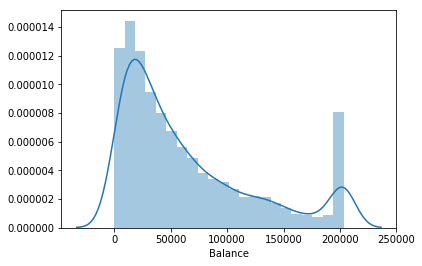

Qual_miles


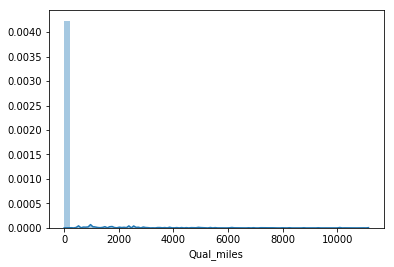

cc1_miles


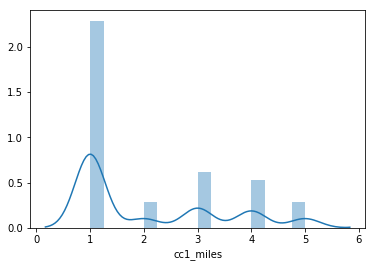

cc2_miles


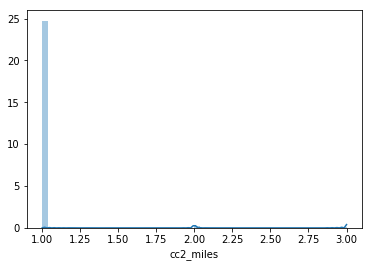

cc3_miles


In [ ]:
for c in airlines.columns:
    print(c)
    sns.distplot(airlines[c])
    plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
airlines_std=StandardScaler().fit_transform(airlines)

### Hierarchial clustering

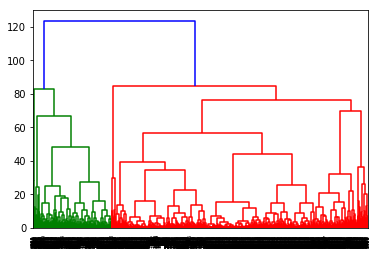

In [ ]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(airlines_std, method='ward'))

The optimal number of clusters are 6 from ward method.

In [ ]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=6, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(airlines_std)

In [ ]:
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])

In [ ]:
data=pd.concat([airlines,Clusters],axis=1)
data.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Clusters
0,28143,0,1,1,1,174,1,0,0,7000,1
1,19244,0,1,1,1,215,2,0,0,6968,1
2,41354,0,1,1,1,4123,4,0,0,7034,1
3,14776,0,1,1,1,500,1,0,0,6952,1
4,97752,0,4,1,1,43300,26,777,4,6935,0


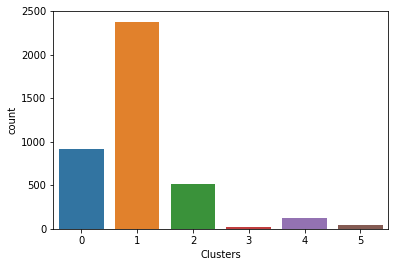

In [ ]:
sns.countplot(data["Clusters"])

Cluster 3 and 5 have very less number of customers. More number of customers are concentrated in Cluster 1.

In [ ]:
data.groupby(data.Clusters).mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
Clusters,,,,,,,,,,
0,106826.114007,46.960912,3.995657,1.000000,1.000000,41518.930510,21.154180,328.077090,2.897937,4877.508143
1,44952.265881,10.314262,1.522087,1.000000,1.000000,6851.514514,8.324779,13.897770,0.089188,3818.473286
2,66040.809339,99.620623,1.035019,1.000000,1.000000,5521.719844,8.149805,625.998054,4.161479,4091.805447
3,100268.277778,65.666667,3.388889,1.000000,3.722222,52595.277778,26.222222,248.944444,1.333333,4488.777778
4,92457.000000,3612.373016,2.349206,1.000000,1.000000,21412.365079,13.571429,328.119048,2.809524,4339.468254
5,55181.418605,23.255814,1.139535,2.348837,1.000000,14409.767442,17.534884,208.813953,2.209302,3968.930233


We focus on Clusters 0,1,2 and 4 for analysis as 3 and 5 have very  few passengers.
* Cluster 0 has more number of balance miles and hence eligible for award travel.
* Cluster 4 has highest average number of miles counted as qualifying for topflight status.
* Cluster 0 has highest average Number of miles earned with freq. flyer credit card in the past 12 months.
* Cluster 3 has the highest average number of miles earned from non-flight bonus transactions in the past 12 months, followed by Cluster 0
* Cluster 2 has by far the highest average number of number of flight miles and the amount of flight transactions in the past 12 months.
* Cluster 0 has the customers that have been with the airline for longer than other clusters.

* Cluster 1 passengers are much newer passengers that have lower number of miles eligible for award travel.
The passengers in this cluster is more and are new. In order to attract these customers we need to offer any discount as they travel in the coming days.
* Since, passengers in cluster 0 have more number of miles saved, the airlines can encourage them to travel in the first class by providing discount.
This will benefit the airlines as well.

### K-means clustering

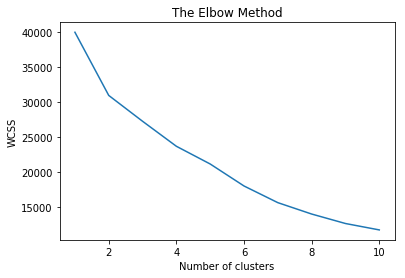

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(airlines_std)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Optimal clusters are 5 from the graph

In [ ]:
kmeans = KMeans(n_clusters = 6, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(airlines_std)

In [ ]:
Clusters=pd.DataFrame(y_kmeans,columns=['k_Clusters'])

In [ ]:
data_2=pd.concat([airlines,Clusters],axis=1)
data_2.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,k_Clusters
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,777,4,6935,4


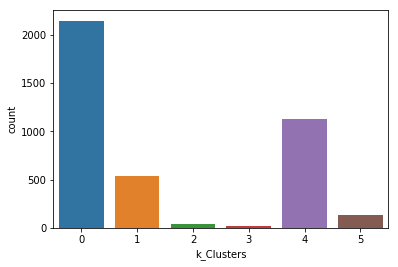

In [ ]:
sns.countplot(data_2["k_Clusters"])

Cluster 2 and 3 have very less number of customers. More number of customers are concentrated in Cluster 0 and followed by 4.

In [ ]:
data_2.groupby(data_2.k_Clusters).mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
k_Clusters,,,,,,,,,,
0,35153.000466,49.999067,1.269123,1.000000,1.000466,4498.039179,6.716884,21.443097,0.122668,3631.945896
1,78240.400742,96.487941,1.348794,1.000000,1.000000,8967.391466,11.126160,683.246753,4.348794,4225.868275
2,55181.418605,23.255814,1.139535,2.348837,1.000000,14409.767442,17.534884,208.813953,2.209302,3968.930233
3,102441.666667,78.800000,3.466667,1.000000,4.066667,55485.400000,28.066667,298.733333,1.600000,4613.866667
4,103760.501331,42.926353,3.867791,1.000000,1.001775,37298.986690,18.988465,176.301686,0.868678,4923.621118
5,126896.603053,2798.083969,2.503817,1.000000,1.000000,27956.969466,26.129771,651.633588,13.648855,4707.564885


We shall analyse the clusters from the below graphs

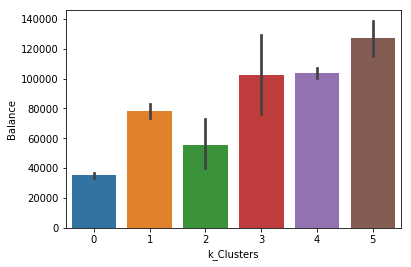

In [ ]:
sns.barplot(data=data_2,x='k_Clusters',y='Balance')

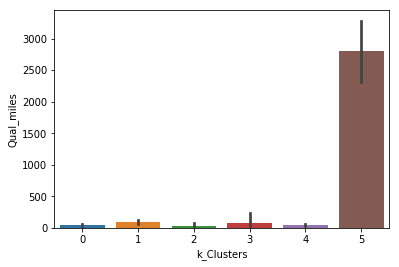

In [ ]:
sns.barplot(data=data_2,x='k_Clusters',y='Qual_miles')

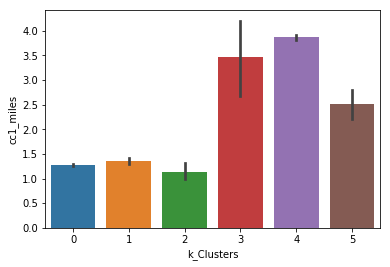

In [ ]:
sns.barplot(data=data_2,x='k_Clusters',y='cc1_miles')

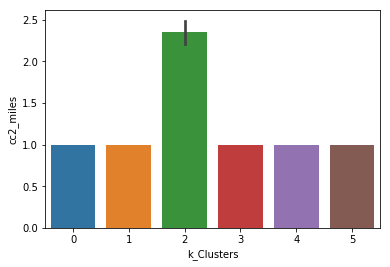

In [ ]:
sns.barplot(data=data_2,x='k_Clusters',y='cc2_miles')

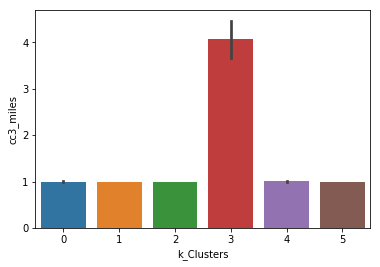

In [ ]:
sns.barplot(data=data_2,x='k_Clusters',y='cc3_miles')

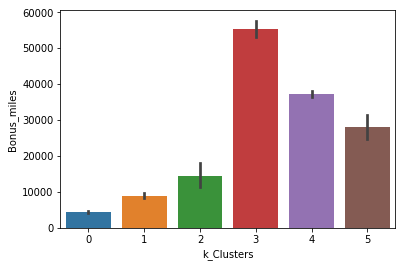

In [ ]:
sns.barplot(data=data_2,x='k_Clusters',y='Bonus_miles')

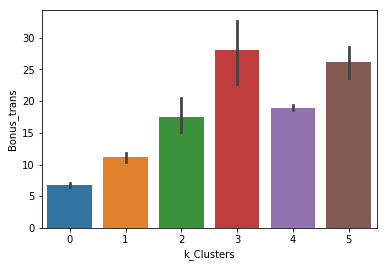

In [ ]:
sns.barplot(data=data_2,x='k_Clusters',y='Bonus_trans')

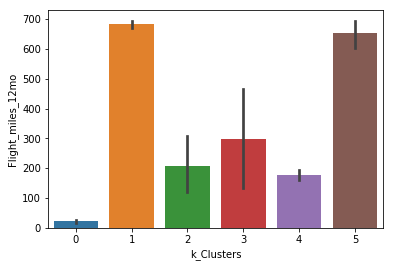

In [ ]:
sns.barplot(data=data_2,x='k_Clusters',y='Flight_miles_12mo')

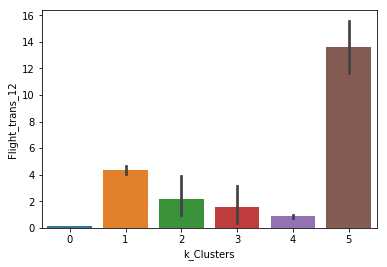

In [ ]:
sns.barplot(data=data_2,x='k_Clusters',y='Flight_trans_12')

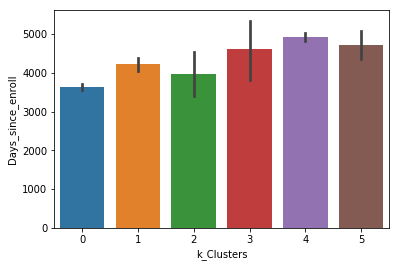

In [ ]:
sns.barplot(data=data_2,x='k_Clusters',y='Days_since_enroll')

We focus on Clusters 0 and 4 for analysis as 2 and 3 have very  few passengers.
* Cluster 5 has more number of balance miles, followed by Cluster 4 and hence eligible for award travel and the highest average number of miles counted as qualifying for topflight status.
* Cluster 4 has highest average Number of miles earned with freq. flyer credit card in the past 12 months.
* Cluster 3 has the highest average number of miles earned from non-flight bonus transactions in the past 12 months, followed by Cluster 0
* Cluster 4 has the customers that have been with the airline for longer than other clusters.
* Since, the number of passengers are more in Cluster 4, let us consider this cluster rather than Cluster 5.

* Cluster 0 passengers are much newer passengers that have lower number of miles eligible for award travel.
The passengers in this cluster is more and are new. In order to attract these customers we need to offer any discount as they travel in the coming days.
* Since, passengers in cluster 4 have more number of miles saved, the airlines can encourage them to travel in the first class by providing discount.
This will benefit the airlines as well.

### DBSCAN modelling

In [ ]:
#k-distance plot to select eps
import numpy as np
from sklearn.neighbors import NearestNeighbors
neigh=NearestNeighbors(n_neighbors=20)
nbrs=neigh.fit(airlines_std)
distances,indices=nbrs.kneighbors(airlines_std)

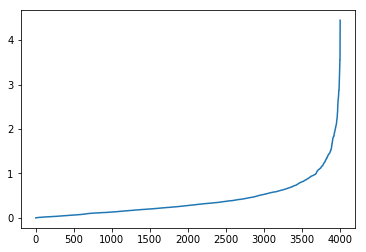

In [ ]:
distances=np.sort(distances,axis=0)
distances=distances[:,1]
distances
plt.plot(distances)

In [ ]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.8, min_samples=20)
dbscan.fit(airlines_std)

DBSCAN(eps=0.8, min_samples=20)

In [ ]:
dbscan.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [ ]:
clust=pd.DataFrame(dbscan.labels_,columns=['Cluster'])

In [ ]:
data_3=pd.concat([airlines,clust],axis=1)
data_3.head(2)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Cluster
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0


In [ ]:
data_3.Cluster.unique()

array([ 0, -1,  2,  1], dtype=int64)

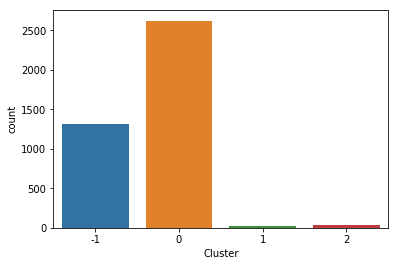

In [ ]:
sns.countplot(data_3["Cluster"])

From the above graph, there are large number of outliers (around 1300) in our cluster. 
The core cluster is densely populated with more than 2500 data points
We have two border points for the core cluster (in graph 1 and 2)